In [17]:
import pickle 
import numpy 
import ecg_plot
import os
import pandas as pd
import random
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [2]:
dataset_save_path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "PickledData", "chapman")
path_to_patient_to_rhythm_dict = os.path.join(dataset_save_path, 'patient_to_rhythm_dict.pickle')

testing_flag = False
# paths to user datasets with no nan values
if testing_flag:
    path_to_user_datasets = os.path.join(dataset_save_path, 'reduced_four_lead_user_datasets_no_nan.pickle')
    path_to_test_train_split_dict = os.path.join(dataset_save_path, 'reduced_test_train_split_dict_no_nan.pickle')
else:
    path_to_user_datasets  = os.path.join(dataset_save_path, 'four_lead_user_datasets_no_nan.pickle')
    path_to_test_train_split_dict = os.path.join(dataset_save_path, "test_train_split_dict_no_nan.pickle")

with open(path_to_user_datasets, 'rb') as f:
    user_datasets = pickle.load(f)

patient_keys = list(user_datasets.keys())

In [31]:
path_to_ecg_data = "C:\\Users\\Kevalee Shah\\Documents\\Cambridge\\Part II\\Project\\Datasets\\Chapman\\ECGDataDenoised"
path_to_diss_diagrams = "C:\\Users\\Kevalee Shah\\Documents\\Cambridge\\Part II\\Project\\Dissertation\\Diagrams"


In [9]:
with open(path_to_patient_to_rhythm_dict, 'rb') as f:
    patient_to_rhythm_dict = pickle.load(f)



In [4]:
def get_ecg_data(path_to_ecg_data, filename):
    path = os.path.join(path_to_ecg_data, f'{filename}.csv')
    data = pd.read_csv(path, header=None)
    # call MinMaxScaler object
    min_max_scaler = MinMaxScaler()
    # feed in a numpy array
    X_train_norm = min_max_scaler.fit_transform(data)
    return X_train_norm.T

MUSE_20180113_075039_84000 SB


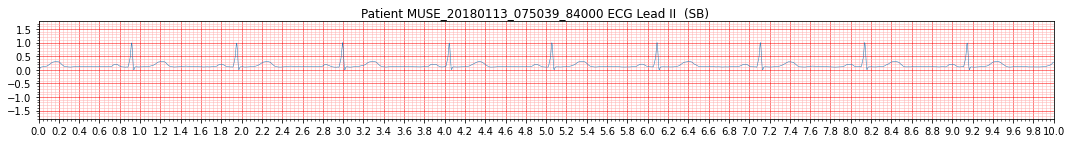

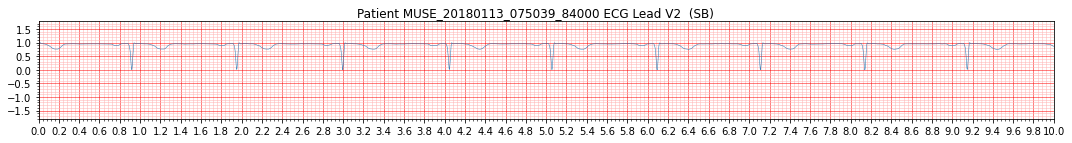

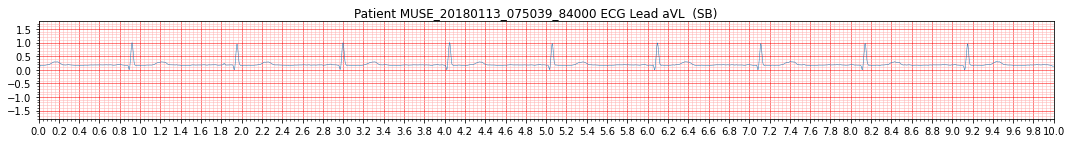

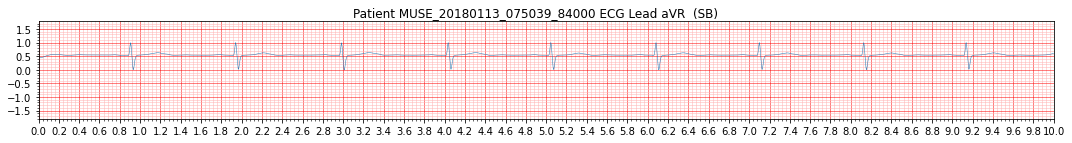

In [45]:
for _ in range(1):
    label = ''
    while label != 'SB':
        patient = random.sample(patient_keys, 1)[0]
        label = patient_to_rhythm_dict[patient]

    print(patient, label)
    
    ecg_data = get_ecg_data(path_to_ecg_data, patient)
    ecg_plot.plot_1(ecg_data[1], title=f'Patient {patient} ECG Lead II  ({label})')
    ecg_plot.plot_1(ecg_data[3], title=f'Patient {patient} ECG Lead V2  ({label})')
    ecg_plot.plot_1(ecg_data[4], title=f'Patient {patient} ECG Lead aVL  ({label})')
    ecg_plot.plot_1(ecg_data[7], title=f'Patient {patient} ECG Lead aVR  ({label})')
    ecg_plot.show()

# Count Number of People with Condition

In [15]:
count_dict = {}

for patient in patient_to_rhythm_dict:
    rhythm = patient_to_rhythm_dict[patient]
    if rhythm in count_dict:
        count_dict[rhythm] += 1
    else:
        count_dict[rhythm] = 1

print(count_dict)

{'AFIB': 2225, 'SB': 3889, 'SR': 2225, 'GSVT': 2267}


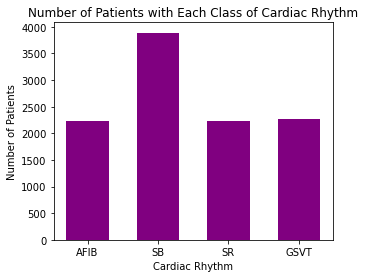

In [48]:
x = count_dict.keys()
y = count_dict.values()
plt.figure(figsize=(5,4))
plt.title('Number of Patients with Each Class of Cardiac Rhythm')
plt.xlabel('Cardiac Rhythm')
plt.ylabel('Number of Patients')
plt.bar(x, y, width=0.6,color='purple')
plt.savefig(os.path.join(path_to_diss_diagrams, 'chapman_rhythm_numbers.pdf'))